# EDA y limpieza de datos
### En este notebook se comenzará la Etapa Exploratoria de Datos, mientras a la vez se encontrarán y ajustarán outliers y valores nulos.

In [39]:
# importación de librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
# Se define función para hacer un preview del dataframe y obtener la forma del mismo
def df_preview(df, n):
    a = display(pd.concat([df.head(n), df.tail(n)]))
    b = 'El dataframe contiene '+ str(df.shape[0]) + ' filas y ' + str(df.shape[1]) + ' columnas'
    return b

In [41]:
# Carga del dataset
df_1 = pd.read_csv('startup_data.csv')
df_1

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [42]:
#Devuelve una lista con el nombre de las 49 columnas que conforman al DataFrame
list(df_1.columns) 

['Unnamed: 0',
 'state_code',
 'latitude',
 'longitude',
 'zip_code',
 'id',
 'city',
 'Unnamed: 6',
 'name',
 'labels',
 'founded_at',
 'closed_at',
 'first_funding_at',
 'last_funding_at',
 'age_first_funding_year',
 'age_last_funding_year',
 'age_first_milestone_year',
 'age_last_milestone_year',
 'relationships',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'state_code.1',
 'is_CA',
 'is_NY',
 'is_MA',
 'is_TX',
 'is_otherstate',
 'category_code',
 'is_software',
 'is_web',
 'is_mobile',
 'is_enterprise',
 'is_advertising',
 'is_gamesvideo',
 'is_ecommerce',
 'is_biotech',
 'is_consulting',
 'is_othercategory',
 'object_id',
 'has_VC',
 'has_angel',
 'has_roundA',
 'has_roundB',
 'has_roundC',
 'has_roundD',
 'avg_participants',
 'is_top500',
 'status']

In [43]:
# Devuelve información relevante sobre cada una de las columnas
df_1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [44]:
# Verifica que la columna 'status' es del tipo binaria
df_1['status'].unique() 

array(['acquired', 'closed'], dtype=object)

In [45]:
# Verifica que exista un cierto balance en los datos
df_1['status'].value_counts() 

acquired    597
closed      326
Name: status, dtype: int64

### Identificando datos faltantes

In [46]:
# Analiza la cantidad de NAs por columna y su incidencia.
df_1.isnull().sum()

# Se inicia lista para incluir las columnas que contengan NAs
dict_1 = df_1.isnull().sum().to_dict()
list_na = [] 
for key, value in dict_1.items():
            if value > 0:
                list_na.append((key, value))

# Print de la lista que contiene NAs ordenados de mayor a menor
list_na = sorted(list_na, key=lambda x: x[1], reverse=True)
print(list_na)

[('closed_at', 588), ('Unnamed: 6', 493), ('age_first_milestone_year', 152), ('age_last_milestone_year', 152), ('state_code.1', 1)]


Predominan los NAs en las columnas closed_at, Unnamed: 6, age_first_milestone_year y age_last_milestone_year, mientras que en 'state_code.1' la cantidad es insignificante.

In [47]:
# Se chequea si state_code y state_code.1 contienen la misma información 
dup_states = df_1['state_code'].compare(df_1['state_code.1'], keep_shape = True, 
                                        keep_equal = True)
dif_states = dup_states[dup_states['other'] != dup_states['self']]
dif_states

,self,other
515,CA,NaN


In [48]:
# Se chequea si status y label son iguales
dup_label = df_1['status'].compare(df_1['labels'], keep_shape = True, 
                                        keep_equal = True)
dif_label = dup_label[dup_label['other'] != dup_label['self']]
dif_label

,self,other
0,acquired,1
1,acquired,1
2,acquired,1
3,acquired,1
4,closed,0
...,...,...
918,acquired,1
919,closed,0
920,closed,0
921,acquired,1


Hay una sola celda distinta entre state_code y state_code.1

# Borrado de columnas:
A continuación se borrarán las columnas:
- *Unnamed: 0* por tener datos que no parecen tener sentido ni utilidad.
- *state_code.1* por ser una columna duplicada de state_code.
- *zip_code y Unnamed: 6* por tener información sobre la locación de la empresa que es poco relevante para el análisis. 
- *object_id y id* porque son columnas duplicadas con información no útil.
- *labels* por contener la misma información que status pero presentada de una manera distinta.

In [49]:
df_1.drop( ['Unnamed: 6', 'state_code.1', 'id', 'zip_code', 'labels', 'object_id'],
               axis = 1, inplace = True)
df_1.pop('Unnamed: 0')
df_1.columns

Index(['state_code', 'latitude', 'longitude', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

## Análisis univariado

Para identificar valores anómalos, se harán boxplots con distintas variables.

<AxesSubplot:ylabel='age_first_funding_year'>

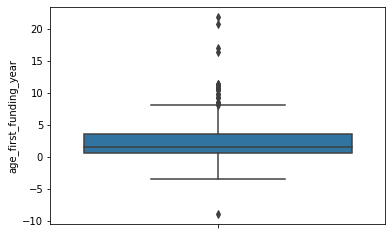

In [50]:
# Tiempo que llevaba abierta la compañía al momento de la primera inversión
sns.boxplot(y = 'age_first_funding_year',  data = df_1)

<AxesSubplot:ylabel='age_last_funding_year'>

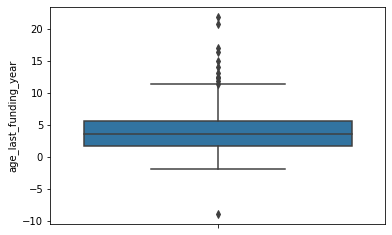

In [51]:
# Tiempo que llevaba abierta la compañía al momento de la última inversión
sns.boxplot(y = 'age_last_funding_year', data = df_1)

<AxesSubplot:ylabel='age_first_milestone_year'>

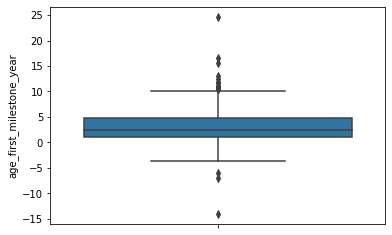

In [52]:
# Tiempo que llevaba abierta la compañía al momento del primer hito alcanzado
sns.boxplot(y = 'age_first_milestone_year', data = df_1)

<AxesSubplot:ylabel='age_last_milestone_year'>

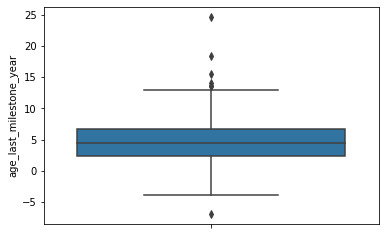

In [53]:
# Tiempo que llevaba abierta la compañía al momento del último hito alcanzado
sns.boxplot(y = 'age_last_milestone_year', data = df_1)

En todas estas columnas se han identificado valores negativos. Como esto es imposible al tratarse de la edad que llevaba la empresa cuando sucedió algo, en el próximo bloque de código los valores negativos serán eliminados.

In [54]:
# Se crea un nuevo DF
df_2 = df_1.drop(df_1[
(df_1['age_first_funding_year']<0) |
(df_1['age_last_funding_year']<0) |
(df_1['age_first_milestone_year']<0) |
(df_1['age_last_milestone_year']<0)
].index)

print(
    df_1.shape,
    df_2.shape,
    df_1.shape[0] - df_2.shape[0] # Indica la cantidad de filas con valores negativos.
)

(923, 42) (840, 42) 83


# Análisis bivariado
En esta sección analizaremos el progreso de las startups adquiridas en el tiempo. Para ello, cambiaremos la columna founded_at para que muestre solo el año.

In [55]:
# Cambiando la columna founded_at para que solo presente el año
df_2['founded_at'] = pd.to_datetime(df_2['founded_at'])
df_2['founded_at'] = df_2['founded_at'].dt.to_period('Y')

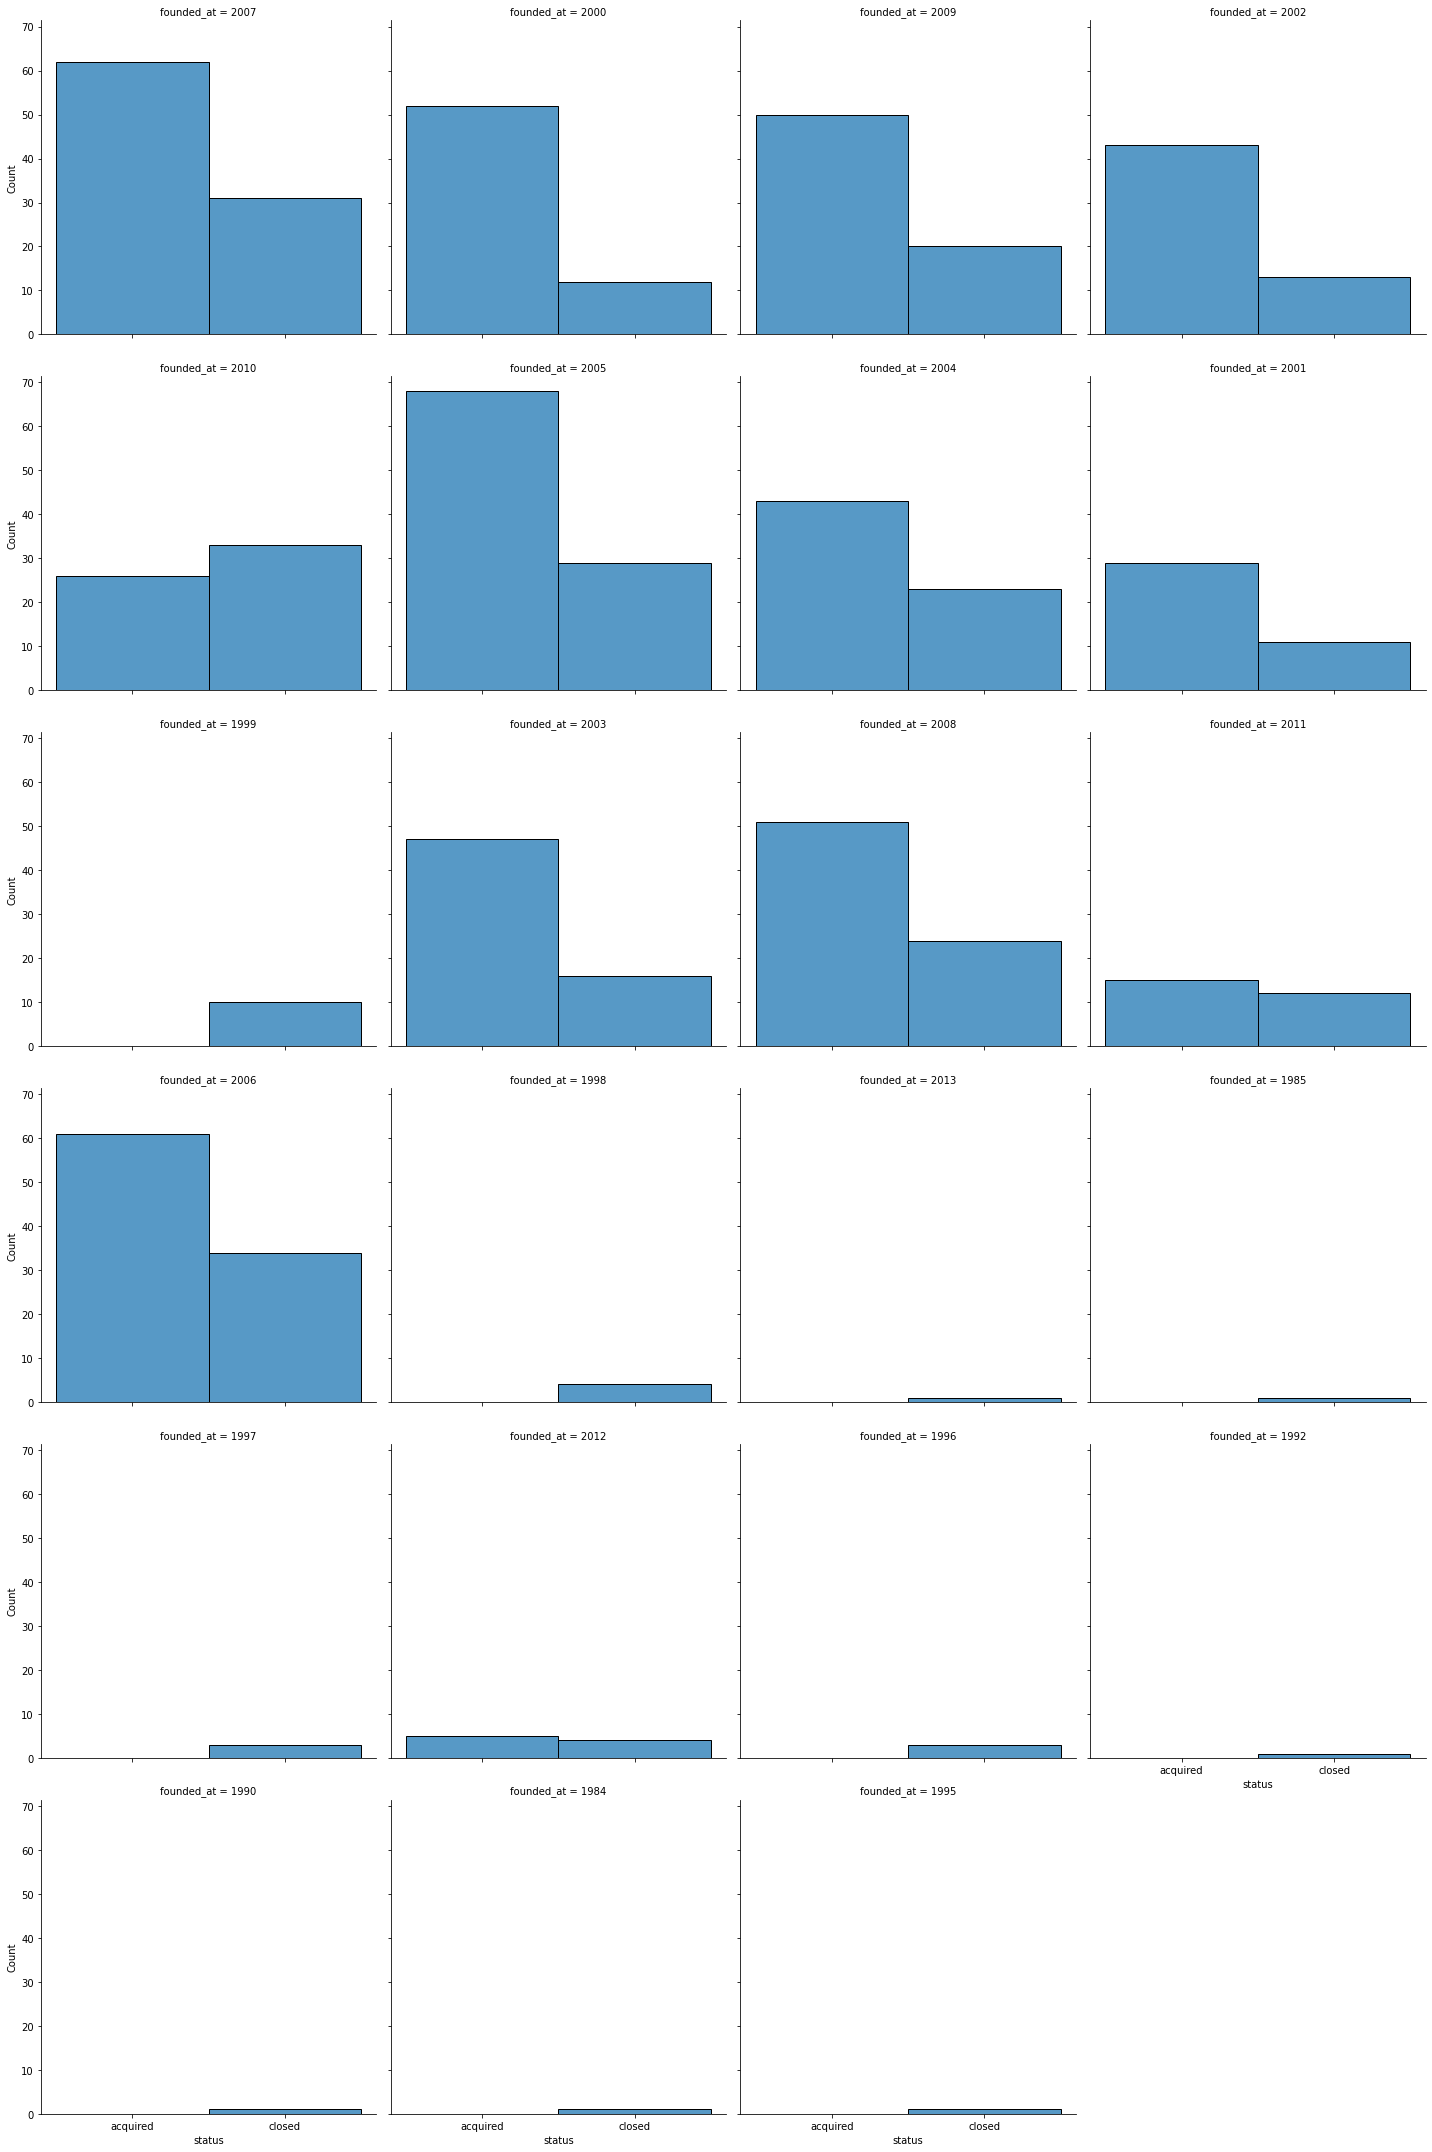

In [56]:
# Se crea el gráfico para compararlo con los valores de status
sns.displot(data = df_2, col = 'founded_at', col_wrap = 4, x = 'status')

El período 2005-2009 es donde más startups fueron adquiridas. El período 2000-2002 también parece haber sido bueno. Los números empeoran en períodos anteriores o posteriores a estos, exceptuando a 2004 que no tuvo un desempeño destacable.